# Uploading the data from the Json files 

In [1]:
#Loading data previously scrapped from Yelp!
import json as JSON

with open('data_1.json') as f:
    rest = JSON.load(f)        #list

with open('reviews_0_50.json') as f:
    reviews_0_50 = JSON.load(f)  #dic

with open('reviews_50_250.json') as f:
    reviews_50_250 = JSON.load(f) #dic
    
with open('reviews_250_500.json') as f:
    reviews_250_500 = JSON.load(f) #dic

with open('reviews_500_750.json') as f:
    reviews_500_750 = JSON.load(f) #dic
    
with open('reviews_750_1000.json') as f:
    reviews_750_1000 = JSON.load(f) #dic

# Creating a list of ids and reviews

In [2]:
#Get all the id's for restaurants list
id_1 = [i['id'] for i in rest]

#List of reviews
id_reviews_key = [reviews_0_50.keys()]
id_reviews_key.append(reviews_50_250.keys())
id_reviews_key.append(reviews_250_500.keys())
id_reviews_key.append(reviews_500_750.keys())
id_reviews_key.append(reviews_750_1000.keys())

#Get another list to compare 
id_reviews_2 = [j for i in id_reviews_key for j in i]

#Creating a list of all reviews
reviews = [reviews_0_50]
reviews.append(reviews_50_250)
reviews.append(reviews_250_500)
reviews.append(reviews_500_750)
reviews.append(reviews_750_1000)

#Creating a dictionary of all reviews
all_reviews = {}
all_reviews.update(reviews_0_50)
all_reviews.update(reviews_50_250)
all_reviews.update(reviews_250_500)
all_reviews.update(reviews_500_750)
all_reviews.update(reviews_750_1000)

# Filter data to only include reviews 2018-2019

In [3]:
import numpy as np
rating=[]
words_reviews = []
list_of_Nones = [None for i in range(0,len(all_reviews))]
id_s = [i for i in all_reviews.keys()]
rest_reviews_2019_2018_filter = dict(zip(id_s,list_of_Nones))

#handling data to create list of reviews, list of rating and filter data
for i in all_reviews:
    rat = []
    rev = []
    for j in all_reviews[i]:
        if int(j['date'][:4]) >= 2018:
            rating.append(j['rating'])
            rat.append(j['rating'])
            words_reviews.append(j['description'])
            rev.append(j['description'])
    rest_reviews_2019_2018_filter[i]={'reviews':rev,'rat':rat}

#getting average 2019 and 2018 ratings for the different restaurants
rankings_2019_2018 =[]
for i in rest_reviews_2019_2018_filter:
    rankings_2019_2018.append(np.mean(rest_reviews_2019_2018_filter[i]['rat']))

rankings_2019_2018 = dict(zip(id_s,rankings_2019_2018))    

C:\Users\algon\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\algon\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


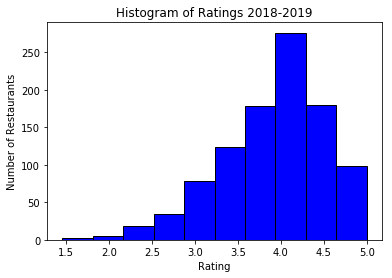

In [10]:
#Plot frequency table 
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(rankings_2019_2018.values(), color = 'blue', edgecolor = 'black')
plt.title('Histogram of Ratings 2018-2019')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show() 


# Tokenize and lemmatize  unigrams

In [5]:
#All reviews into a list
all_reviews_order_by_rest = []

for i in rest_reviews_2019_2018_filter:
    rev = []
    for j in rest_reviews_2019_2018_filter[i]['reviews']:
        rev.append(j)
    all_reviews_order_by_rest.append(rev)

#tokenize each review
import spacy
nlp = spacy.load('en_core_web_sm')
parsed_text_2=[]
for i in all_reviews_order_by_rest:
    reviews_for_each_restaurant =[]
    for j in i:
        parsed_text = nlp(j)
        reviews_for_each_restaurant.append(parsed_text)
    parsed_text_2.append(reviews_for_each_restaurant)
    
#lemmatize word in each review
parsed_reviews_each_rest=[]
for rest in parsed_text_2:
    res_1 = []
    for rev in rest:
        rev_1 =[]
        for token in rev:
            lemma = token.lemma_.lower()
            if not (nlp.vocab[lemma].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or lemma =='-pron-'):
                rev_1.append(lemma)
        res_1.append(' '.join(rev_1))
    parsed_reviews_each_rest.append(res_1)


"\n#tokenize each review\nimport spacy\nnlp = spacy.load('en_core_web_sm')\nparsed_text_2=[]\nfor i in all_reviews_order_by_rest:\n    reviews_for_each_restaurant =[]\n    for j in i:\n        parsed_text = nlp(j)\n        reviews_for_each_restaurant.append(parsed_text)\n    parsed_text_2.append(reviews_for_each_restaurant)\n    \n#lemmatize word in each review\nparsed_reviews_each_rest=[]\nfor rest in parsed_text_2:\n    res_1 = []\n    for rev in rest:\n        rev_1 =[]\n        for token in rev:\n            lemma = token.lemma_.lower()\n            if not (nlp.vocab[lemma].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or lemma =='-pron-'):\n                rev_1.append(lemma)\n        res_1.append(' '.join(rev_1))\n    parsed_reviews_each_rest.append(res_1)\n"

In [9]:
count = [j for i in rest_reviews_2019_2018_filter for j in i]

In [262]:
#Save the previous into a Json File
'''
json = JSON.dumps(parsed_reviews_each_rest)
f = open("parsed_reviews_each_rest.json","w")
f.write(json)
f.close()
'''

'''
with open('parsed_rev_each_rest.json') as f:
    parsed_reviews_each_rest = JSON.load(f)
'''

# Dimensionality reduction to see if there is valuable information in the tokenize words

In [10]:
parsed_all_reviews = []
for i in parsed_reviews_each_rest:
    for j in i:
        parsed_all_reviews.append(j)
        
#Count Vectorize each review
from sklearn.feature_extraction.text import CountVectorizer
Count_Vect = CountVectorizer(min_df=50,stop_words='english', max_df=0.8)
document_vect = Count_Vect.fit_transform(parsed_all_reviews)    

#PCA with two components
from sklearn.decomposition import PCA
PCA_yelp = PCA(n_components=2)  
PCA_yelp.fit(document_vect.toarray())
PCA_yelp_2 = PCA_yelp.transform(document_vect.toarray())

#plot components
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(PCA_yelp_2[:,0], PCA_yelp_2[:,1],c=[i for i in rating],cmap='Spectral')

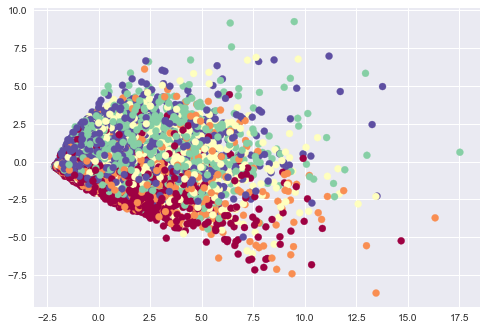

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(PCA_yelp_2[:,0], PCA_yelp_2[:,1],c=[i for i in rating],cmap='Spectral')

# TSNE Reduction and TfidTransformer

In [51]:
rating_array = np.array(rating)
from sklearn.feature_extraction.text import TfidfTransformer 
tdif_trans = TfidfTransformer(smooth_idf=True,use_idf=True)
TSNE_document_vect = tdif_trans.fit_transform(document_vect)

msk = np.random.rand(len(rating_array)) < 0.1
rating_sample = rating_array[msk]
document_vect_sample = document_vect[msk]

document_vect_sample_TSNE = TSNE_document_vect[msk]


In [77]:
#Search for difference in the different rankings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000, random_state=0,learning_rate=600)
prob_vectors = tsne.fit_transform(document_vect_sample_TSNE.toarray())

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3019 samples in 0.207s...
[t-SNE] Computed neighbors for 3019 samples in 29.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3019
[t-SNE] Computed conditional probabilities for sample 2000 / 3019
[t-SNE] Computed conditional probabilities for sample 3000 / 3019
[t-SNE] Computed conditional probabilities for sample 3019 / 3019
[t-SNE] Mean sigma: 0.191790
[t-SNE] KL divergence after 250 iterations with early exaggeration: 118.123077
[t-SNE] KL divergence after 5000 iterations: 2.249362


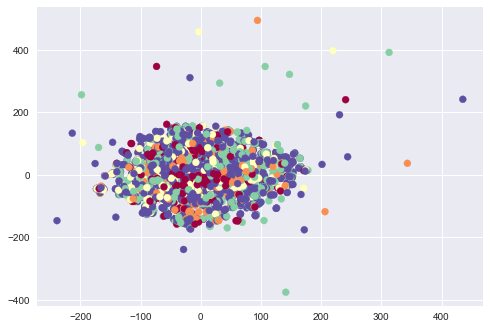

In [79]:
plt.scatter(prob_vectors[:,0], prob_vectors[:,1],c=[i for i in rating_sample],cmap='Spectral')

# Getting a count of words for each rating

In [15]:
#Getting most common words for the ratings
bool_rating_5 = rating_array==5
bool_rating_4 = rating_array==4
bool_rating_3 = rating_array==3
bool_rating_2 = rating_array==2
bool_rating_1 = rating_array==1

n_reviews_1 = len(list(np.array(parsed_all_reviews)[bool_rating_1]))
n_reviews_2 = len(list(np.array(parsed_all_reviews)[bool_rating_2]))
n_reviews_3 = len(list(np.array(parsed_all_reviews)[bool_rating_3]))
n_reviews_4 = len(list(np.array(parsed_all_reviews)[bool_rating_4]))
n_reviews_5 = len(list(np.array(parsed_all_reviews)[bool_rating_5]))

reviews_1= list(np.array(parsed_all_reviews)[bool_rating_1])
reviews_2= list(np.array(parsed_all_reviews)[bool_rating_2])
reviews_3= list(np.array(parsed_all_reviews)[bool_rating_3])
reviews_4= list(np.array(parsed_all_reviews)[bool_rating_4])
reviews_5= list(np.array(parsed_all_reviews)[bool_rating_5])

from collections import Counter
from operator import itemgetter

histogram_1 = Counter()
for i in reviews_1:
    t = i.split(' ')
    for j in t:
        histogram_1[j]+=1

from operator import itemgetter
sorted_token_count_pairs_1 = sorted(histogram_1.items(),
                                  reverse=True,
                                  key=itemgetter(1))
'''
for token, count in sorted_token_count_pairs_1:
    print(token, ":", count)
'''

histogram_2 = Counter()
for i in reviews_2:
    t = i.split(' ')
    for j in t:
        histogram_2[j]+=1

from operator import itemgetter
sorted_token_count_pairs_2 = sorted(histogram_2.items(),
                                  reverse=True,
                                  key=itemgetter(1))
'''
for token, count in sorted_token_count_pairs_2:
    print(token, ":", count)
    
'''



In [16]:
from collections import Counter
from operator import itemgetter

histogram_1 = Counter()
for i in reviews_1:
    t = i.split(' ')
    for j in t:
        histogram_1[j]+=1

from operator import itemgetter
sorted_token_count_pairs_1 = sorted(histogram_1.items(),
                                  reverse=True,
                                  key=itemgetter(1))
'''
for token, count in sorted_token_count_pairs_1:
    print(token, ":", count)
'''
histogram_2 = Counter()
for i in reviews_2:
    t = i.split(' ')
    for j in t:
        histogram_2[j]+=1

sorted_token_count_pairs_2 = sorted(histogram_2.items(),
                                  reverse=True,
                                  key=itemgetter(1))
'''
for token, count in sorted_token_count_pairs_2:
    print(token, ":", count)
    
'''
histogram_3 = Counter()
for i in reviews_3:
    t = i.split(' ')
    for j in t:
        histogram_3[j]+=1


sorted_token_count_pairs_3 = sorted(histogram_3.items(),
                                  reverse=True,
                                  key=itemgetter(1))
'''
for token, count in sorted_token_count_pairs_3:
    print(token, ":", count)
'''
histogram_4 = Counter()
for i in reviews_4:
    t = i.split(' ')
    for j in t:
        histogram_4[j]+=1


sorted_token_count_pairs_4 = sorted(histogram_4.items(),
                                  reverse=True,
                                  key=itemgetter(1))
'''
for token, count in sorted_token_count_pairs_4:
    print(token, ":", count)
'''
histogram_5 = Counter()
for i in reviews_5:
    t = i.split(' ')
    for j in t:
        histogram_5[j]+=1


sorted_token_count_pairs_5 = sorted(histogram_5.items(),
                                  reverse=True,
                                  key=itemgetter(1))
'''
for token, count in sorted_token_count_pairs:
    print(token, ":", count)
'''

'\nfor token, count in sorted_token_count_pairs_1:\n    print(token, ":", count)\n'

# Getting only words in each of the different ratings

In [21]:
#This is not a good approach, only getting typos
only_words_in_5=[]
for i in histogram_5.keys():
    if i not in set(histogram_4.keys()).union(set(histogram_3.keys()),set(histogram_2.keys()),set(histogram_1.keys())):
        only_words_in_5.append(i)

only_words_in_4=[]
for i in histogram_4.keys():
    if i not in set(histogram_5.keys()).union(set(histogram_3.keys()),set(histogram_2.keys()),set(histogram_1.keys())):
        only_words_in_4.append(i)

only_words_in_3=[]
for i in histogram_3.keys():
    if i not in set(histogram_5.keys()).union(set(histogram_4.keys()),set(histogram_2.keys()),set(histogram_1.keys())):
        only_words_in_3.append(i)        
        
only_words_in_2=[]
for i in histogram_2.keys():
    if i not in set(histogram_5.keys()).union(set(histogram_4.keys()),set(histogram_3.keys()),set(histogram_1.keys())):
        only_words_in_2.append(i) 

only_words_in_1=[]
for i in histogram_1.keys():
    if i not in set(histogram_5.keys()).union(set(histogram_4.keys()),set(histogram_3.keys()),set(histogram_1.keys())):
        only_words_in_1.append(i)   

#  Bigrams approach

In [136]:
#not cleaning for stops words, we are not getting meaningfull meaning

parsed_reviews_each_rest_bigram=[]
for rest in parsed_text_2:
    res_1 = []
    for rev in rest:
        rev_1 =[]
        for token in rev:
            lemma = token.lemma_.lower()
            if not (token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or lemma =='-pron-'):
                rev_1.append(lemma)
        res_1.append(' '.join(rev_1))
    parsed_reviews_each_rest_bigram.append(res_1)


In [144]:

import nltk
parsed_bigrams =[]
for i in parsed_reviews_each_rest_bigram:
    bigrm =[]
    for j in i:
        bigrm.append(list(nltk.bigrams(j.split())))
    parsed_bigrams.append(bigrm)


In [152]:

parsed_all_reviews_bigram=[]
for i in parsed_bigrams:
    for j in i:
        parsed_all_reviews_bigram.append(j)


In [169]:

parsed_reviews_each_rest_bigram_graph = []
for i in parsed_reviews_each_rest_bigram:
    for j in i:
        parsed_reviews_each_rest_bigram_graph.append(j)

Count_Vect_big = CountVectorizer(min_df=50, max_df=0.8,ngram_range=(2,2))
document_vect_big = Count_Vect_big.fit_transform(parsed_reviews_each_rest_bigram_graph)


In [172]:

PCA_yelp_big = PCA(n_components=2)  
PCA_yelp_big.fit(document_vect_big.toarray())
PCA_yelp_2_big = PCA_yelp_big.transform(document_vect_big.toarray())


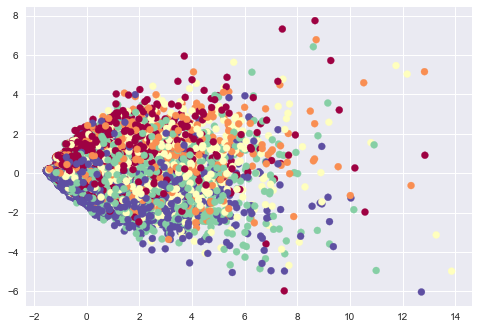

In [174]:
plt.scatter(PCA_yelp_2_big[:,0], PCA_yelp_2_big[:,1],c=[i for i in rating],cmap='Spectral')

In [175]:

document_vect_sample_big = document_vect_big[msk]


In [180]:

tsne_2 = TSNE(n_components=2, verbose=1, perplexity=1, n_iter=5000, random_state=0,learning_rate=600)
prob_vectors_2 = tsne_2.fit_transform(document_vect_sample_big.toarray())


[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 3019 samples in 0.690s...
[t-SNE] Computed neighbors for 3019 samples in 85.928s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3019
[t-SNE] Computed conditional probabilities for sample 2000 / 3019
[t-SNE] Computed conditional probabilities for sample 3000 / 3019
[t-SNE] Computed conditional probabilities for sample 3019 / 3019
[t-SNE] Mean sigma: 0.520359
[t-SNE] KL divergence after 250 iterations with early exaggeration: 171.779724
[t-SNE] KL divergence after 5000 iterations: 5.137467


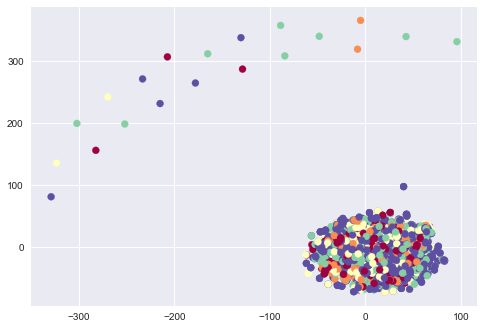

In [181]:
plt.scatter(prob_vectors_2[:,0], prob_vectors_2[:,1],c=[i for i in rating_sample],cmap='Spectral')

In [186]:

parsed_all_reviews_bigram_2=[]
for i in parsed_all_reviews_bigram:
    rev = []
    for j in i:
        rev.append(' '.join(j))
    parsed_all_reviews_bigram_2.append(rev)

reviews_1_big= list(np.array(parsed_all_reviews_bigram_2)[bool_rating_1])
reviews_2_big= list(np.array(parsed_all_reviews_bigram_2)[bool_rating_2])
reviews_3_big= list(np.array(parsed_all_reviews_bigram_2)[bool_rating_3])
reviews_4_big= list(np.array(parsed_all_reviews_bigram_2)[bool_rating_4])
reviews_5_big= list(np.array(parsed_all_reviews_bigram_2)[bool_rating_5])


In [192]:

histogram_1_big = Counter()
for i in reviews_1_big:
    for j in i:
        histogram_1_big[j]+=1


from operator import itemgetter
sorted_token_count_pairs = sorted(histogram_1_big.items(),
                                  reverse=True,
                                  key=itemgetter(1))



: 150
the kitchen : 149
back to : 149
and then : 148
to order : 148
have not : 146
no one : 144
taste like : 144
of a : 142


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 : 63
minute and : 63
be completely : 63
of be : 63
less than : 63
not do : 62
the customer : 62
that could : 62
food come : 62
for lunch : 62
to sit : 62
food have : 62
the sauce : 62
restaurant in : 61
40 minute : 61
side of : 61
not to : 61
be what : 61
a drink : 61
but not : 61
into the : 61
of time : 61
have an : 61
like this : 61
down the : 61
the burger : 61
not give : 61
and this : 60
an order : 60
be more : 60
walk away : 60
able to : 60
a nice : 60
over and : 60
not think : 60
this establishment : 59
kind of : 59
some of : 59
as the : 59
drink order : 59
that this : 59
have order : 59
if the : 59
chicken and : 59
never be : 59
pizza and : 59
a bit : 59
time have : 59
go on : 59
think be : 59
when get : 59
not take : 58
be suppose : 58
recommend this : 58
be give : 58
and walk : 58
this review : 58
for dinner : 58
such a : 58
be take : 57
from this : 57
top of : 57
see the : 57
just a : 57
experience be : 57
tell to : 57
there for : 57
a great : 57
be wrong : 57
a large : 57
c

cold the : 18
why would : 18
delivery driver : 18
the topping : 18
drink the : 18
pepper and : 18
on hold : 18
wash hand : 18
another 30 : 17
that a : 17
counter and : 17
mention the : 17
put the : 17
then ask : 17
that all : 17
go by : 17
drink but : 17
just say : 17
wish could : 17
old and : 17
get bad : 17
server have : 17
so call : 17
in order : 17
experience in : 17
and put : 17
time this : 17
an option : 17
have say : 17
something to : 17
save money : 17
bar for : 17
with and : 17
to share : 17
never do : 17
never ever : 17
a call : 17
and actually : 17
and send : 17
pay extra : 17
week ago : 17
sit and : 17
a really : 17
a cold : 17
give up : 17
for check : 17
here before : 17
wife 's : 17
pay the : 17
wing and : 17
bad part : 17
split the : 17
the flavor : 17
fast food : 17
a zero : 17
though the : 17
be ridiculous : 17
to help : 17
give an : 17
receive the : 17
thing that : 17
overall the : 17
compare to : 17
problem with : 17
each time : 17
below average : 17
from there : 17


be fault : 10
finish meal : 10
a young : 10
young man : 10
stand by : 10
of everything : 10
waitress say : 10
by to : 10
sad to : 10
crust be : 10
so so : 10
the dough : 10
choose to : 10
no explanation : 10
but unfortunately : 10
about 5 : 10
attention of : 10
interested in : 10
charge the : 10
and manager : 10
towards the : 10
if order : 10
fresh and : 10
what pay : 10
no cheese : 10
from be : 10
to avoid : 10
10 for : 10
cream cheese : 10
try out : 10
give food : 10
work here : 10
be incorrect : 10
feel the : 10
there because : 10
least 20 : 10
this morning : 10
to save : 10
re - : 10
be complete : 10
ask be : 10
disappointed the : 10
$ 1 : 10
overprice for : 10
a guy : 10
sour cream : 10
be down : 10
but to : 10
stand around : 10
for everything : 10
issue be : 10
treat customer : 10
have nothing : 10
min wait : 10
of 10 : 10
way out : 10
about order : 10
story short : 10
assume be : 10
then order : 10
as could : 10
definitely would : 10
the room : 10
only get : 10
all together : 10

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 9
chicken parm : 9
wait 40 : 9
business to : 9
sense of : 9
a buffalo : 9
order with : 9
be cheap : 9
restaurant again : 9
the bowl : 9
here so : 9
sauce the : 9
up from : 9
grubhub and : 9
not change : 9
this order : 9
be around : 9
chicken on : 9
tomato sauce : 9
with 3 : 9
in about : 9
the 3 : 9
counter be : 9
shame on : 9
during a : 9
decide on : 9
a real : 9
have time : 9
leave will : 9
round of : 9
drink or : 9
approach the : 9
restaurant a : 9
with meal : 9
in addition : 9
to expect : 9
take up : 9
indian food : 9
make with : 9
about 4 : 9
steak and : 9
and always : 9
green pepper : 9
the yard : 9
any meat : 9
choose this : 9
not happen : 9
that serve : 9
this will : 9
white pizza : 9
delivery guy : 9
italian restaurant : 9
way home : 9
get wait : 9
to for : 9
insist that : 9
blame for : 9
maybe should : 9
however this : 9
deep fry : 9
woman 's : 9
to apologize : 9
the dirty : 9
right and : 9
a refill : 9
review before : 9
the gyro : 9
to house : 9
be fry : 9
absolutely disgust

choose the : 6
start walk : 6
the public : 6
menu that : 6
a cake : 6
not mean : 6
something like : 6
event the : 6
on an : 6
for everyone : 6
not usually : 6
waitress about : 6
hold the : 6
group and : 6
to 1 : 6
be cut : 6
shame that : 6
because will : 6
and while : 6
wine be : 6
notice a : 6
this issue : 6
extra $ : 6
thing do : 6
will try : 6
just pay : 6
young lady : 6
all who : 6
two bite : 6
the consistency : 6
consistency of : 6
easy to : 6
gross be : 6
one from : 6
everything that : 6
of white : 6
may not : 6
zero if : 6
very dry : 6
friend get : 6
barely have : 6
just gross : 6
cheese have : 6
meat the : 6
two slice : 6
decor be : 6
in what : 6
pull pork : 6
ok not : 6
warm the : 6
first impression : 6
be cover : 6
build own : 6
big mistake : 6
tip for : 6
only positive : 6
other guest : 6
seat a : 6
people when : 6
the waitlist : 6
leave never : 6
before have : 6
some good : 6
never leave : 6
zero flavor : 6
the part : 6
texture and : 6
or that : 6
as one : 6
of salt : 6
gam

because make : 5
this up : 5
be dine : 5
alert the : 5
order another : 5
service all : 5
on after : 5
not live : 5
tram 's : 5
's kitchen : 5
own the : 5
nice people : 5
summer roll : 5
other dish : 5
broth be : 5
call before : 5
insult to : 5
must say : 5
minute or : 5
side and : 5
awhile to : 5
friendly the : 5
that also : 5
and raw : 5
raw in : 5
set the : 5
in 2 : 5
and ready : 5
long day : 5
make sick : 5
kind but : 5
up call : 5
also tell : 5
disappointed be : 5
two star : 5
's salad : 5
a human : 5
salad do : 5
not cut : 5
bread the : 5
for soup : 5
chicken noodle : 5
check this : 5
understand be : 5
be pre : 5
a thin : 5
drive all : 5
the plastic : 5
to prove : 5
lack flavor : 55
a serious : 5
other choice : 5
like there : 5
as say : 5
up here : 5
get lunch : 5
busy talk : 5
wing night : 5
a bland : 5
delivery at : 5
the mount : 5
well so : 5
here tonight : 5
forever and : 5
much bad : 5
show that : 5
sometimes be : 5
and brother : 5
plate for : 5
disrespectful and : 5
such as 

of plastic : 4
brunch have : 4
next year : 4
this event : 4
for many : 4
no check : 4
and handle : 4
up this : 4
well run : 4
of fish : 4
nice dinner : 4
a crisp : 4
par with : 4
past experience : 4
on as : 4
the naan : 4
that receive : 4
small bowl : 4
a loyal : 4
remind that : 4
because really : 4
but keep : 4
takeout or : 4
and today : 4
smell and : 4
disappointment and : 4
cut up : 4
then touch : 4
miso soup : 4
pay that : 4
taste so : 4
imitation crab : 4
anyone that : 4
when approach : 4
here not : 4
be show : 4
instead the : 4
amazing food : 4
small for : 4
therefore be : 4
double the : 4
side note : 4
well pizza : 4
margarita have : 4
good on : 4
a pitcher : 4
the truth : 4
so poorly : 4
stick in : 4
town with : 4
smile and : 4
be important : 4
important to : 4
that like : 4
a tourist : 4
be pleasant : 4
get menu : 4
the presentation : 4
presentation of : 4
either do : 4
should never : 4
ask server : 4
which never : 4
semi - : 4
high quality : 4
rum and : 4
5 the : 4
have 1 : 4

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




would skip : 3
bother be : 3
recently and : 3
all bread : 3
hunt for : 3
for small : 3
egg sandwich : 3
thin slice : 3
the coleslaw : 3
taste very : 3
on trip : 3
philly cheesesteak : 3
cheesesteak and : 3
right over : 3
over be : 3
coleslaw and : 3
who like : 3
place obviously : 3
between two : 3
and many : 3
most bland : 3
please explain : 3
a salt : 3
bring home : 3
patron have : 3
have review : 3
make even : 3
but first : 3
ingredient and : 3
no real : 3
but trust : 3
trust the : 3
and trendy : 3
would imagine : 3
10 different : 3
positive note : 3
spicy but : 3
that sometimes : 3
guest who : 3
industry and : 3
get name : 3
when realize : 3
like here : 3
almost 45 : 3
concept but : 3
staff at : 3
first think : 3
high expectation : 3
overly sweet : 3
cool if : 3
deserve the : 3
be struggle : 3
way can : 3
chalk up : 3
good with : 3
good also : 3
give people : 3
people the : 3
the ability : 3
plate or : 3
of bean : 3
disgusting do : 3
to determine : 3
apparently a : 3
town will : 3


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



: 3
pizza take : 3
people here : 3
here from : 3
of slice : 3
slice look : 3
bad tasting : 3
24 year : 3
car to : 3
manager but : 3
partner have : 3
return food : 3
question be : 3
how have : 3
in 2019 : 3
a sicilian : 3
sicilian pizza : 3
time yesterday : 3
an inch : 3
half pepperoni : 3
a 12 : 3
really eat : 3
many pizza : 3
york pizza : 3
to both : 3
say both : 3
's over : 3
while sit : 3
stare down : 3
store to : 3
steal from : 3
family for : 3
apologize the : 3
truly sad : 3
a decade : 3
2 family : 3
have child : 3
customer go : 3
to resolve : 3
postmates and : 3
through be : 3
meal even : 3
and hair : 3
back now : 3
sample the : 3
table 's : 3
be answer : 3
acknowledge at : 3
an excellent : 3
and feed : 3
especially on : 3
no organization : 3
then maybe : 3
much so : 3
beef fat : 3
management of : 3
for dish : 3
a common : 3
shrimp fry : 3
there ever : 3
tell friend : 3
honestly would : 3
to face : 3
order twice : 3
one dish : 3
tip which : 3
christmas eve : 3
an entree : 3
orang

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3
will eat : 3
very cold : 3
same way : 3
be fun : 3
waitress sit : 3
just hope : 3
sad part : 3
offer some : 3
total bill : 3
only four : 3
up pizza : 3
nothing will : 3
a response : 3
off only : 3
out never : 3
raw sprout : 3
balsamic vinegar : 3
street in : 3
only on : 3
beverage and : 3
away on : 3
high school : 3
take 1 : 3
deliver when : 3
change will : 3
again either : 3
server over : 3
service experience : 3
someone there : 3
any order : 3
party who : 3
mark and : 3
and although : 3
some appetizer : 3
off then : 3
other for : 3
for chicken : 3
review even : 3
taste bad : 3
no pleasure : 3
with leave : 3
there before : 3
establishment but : 3
everyone include : 3
leave alone : 3
that live : 3
problem right : 3
even longer : 3
try new : 3
and freeze : 3
in own : 3
server in : 3
2 large : 3
beef on : 3
and cool : 3
do even : 3
come close : 3
down as : 3
as never : 3
not affect : 3
would deliver : 3
close but : 3
this so : 3
for pancake : 3
crust on : 3
be pink : 3
the waterfront :

light up : 2
pressure on : 2
and soon : 2
at sienna : 2
email the : 2
4 pm : 2
no alcohol : 2
computer be : 2
promise and : 2
5 server : 2
to event : 2
time even : 2
see one : 2
when completely : 2
cut have : 2
the pastry : 2
pastry chef : 2
not capable : 2
of cut : 2
a massive : 2
cake cutting : 2
the knife : 2
like use : 2
host the : 2
the event : 2
deliver with : 2
be assure : 2
go where : 2
charge a : 2
22 % : 2
% be : 2
standard in : 2
many mistake : 2
and refund : 2
refund $ : 2
200 for : 2
only exception : 2
exception to : 2
above and : 2
beyond to : 2
service very : 2
not mix : 2
host say : 2
extremely uncomfortable : 2
anymore do : 2
about these : 2
be summer : 2
summer and : 2
be upstairs : 2
at mezzo : 2
have wine : 2
the fillet : 2
6 slice : 2
fry potato : 2
some arugula : 2
arugula be : 2
minute since : 2
since all : 2
's dinner : 2
express dissatisfaction : 2
with pay : 2
see several : 2
finally walk : 2
a step : 2
of daughter : 2
be 6 : 2
other meal : 2
people from : 2
c

not around : 2
find then : 2
minute this : 2
hour since : 2
story be : 2
same mistake : 2
mistake do : 2
out can : 2
shame too : 2
be repeat : 2
not toast : 2
toast at : 2
avocado toast : 2
and runny : 2
long do : 2
reason not : 2
stop on : 2
enjoy so : 2
manner be : 2
of young : 2
which 3 : 2
out room : 2
obviously forget : 2
appear for : 2
minute see : 2
from across : 2
without apology : 2
attitude say : 2
review if : 2
seem apologetic : 2
over 25 : 2
other excellent : 2
ruin everything : 2
not close : 2
all to : 2
leave since : 2
drink also : 2
bar service : 2
table during : 2
during happy : 2
appetizer salad : 2
bring two : 2
together at : 2
time except : 2
left and : 2
two child : 2
be halfway : 2
so really : 2
mind have : 2
about do : 2
long when : 2
away will : 2
party or : 2
sit 3 : 2
while just : 2
every drink : 2
appetizer then : 2
$ 37 : 2
just 5 : 2
in soy : 2
miso as : 2
find three : 2
food super : 2
unfortunately no : 2
super gross : 2
disappointing but : 2
but like : 2
l

at different : 2
all one : 2
on site : 2
with past : 2
desire for : 2
taco taste : 2
taco all : 2
and learn : 2
manager rudely : 2
point or : 2
read that : 2
that right : 2
over order : 2
a lamb : 2
with open : 2
sand in : 2
the haleem : 2
what bother : 2
bother the : 2
most be : 2
handle customer : 2
customer complaint : 2
garlic fry : 2
boyfriend order : 2
out smell : 2
bit be : 2
different color : 2
burn garlic : 2
fry garlic : 2
do personally : 2
cooked order : 2
through door : 2
quite sometime : 2
food most : 2
again find : 2
new soup : 2
very careful : 2
time also : 2
food preparation : 2
see some : 2
much later : 2
than husband : 2
same as : 2
earlier than : 2
raman and : 2
min which : 2
think forget : 2
forget order : 2
corn the : 2
spicy broth : 2
spicy the : 2
cold from : 2
bar ever : 2
noodle the : 2
time well : 2
sour and : 2
and assure : 2
assure be : 2
eat 3 : 2
stare in : 2
in shock : 2
the hope : 2
sushi counter : 2
counter cut : 2
fish go : 2
knife and : 2
fish would :

bathroom but : 2
terrify to : 2
bathroom door : 2
a clean : 2
too so : 2
in around : 2
salad seem : 2
much if : 2
with could : 2
cost the : 2
fully expect : 2
bad stay : 2
be reserved : 2
manager wait : 2
the vodka : 2
spicy stoli : 2
bloody be : 2
cake sandwich : 2
with potato : 2
potato hash : 2
prepare as : 2
as fry : 2
another option : 2
onion so : 2
the above : 2
lose as : 2
all come : 2
go behind : 2
bar without : 2
any work : 2
drink sit : 2
stoli and : 2
fresh one : 2
one for : 2
tomato juice : 2
own and : 2
with hot : 2
make say : 2
bartender know : 2
the recipe : 2
recipe for : 2
and lime : 2
same old : 2
small cut : 2
send away : 2
to multiple : 2
upcharge on : 2
check from : 2
now $ : 2
from hell : 2
any would : 2
great option : 2
size but : 2
bar if : 2
start let : 2
get stomach : 2
stomach pain : 2
pain and : 2
bad manager : 2
truly the : 2
of if : 2
can barely : 2
maybe some : 2
- cooked : 2
old oil : 2
again next : 2
the set : 2
extremely depressing : 2
really taste : 2

drain unless : 2
unless plan : 2
on resell : 2
resell the : 2
wine will : 2
the sate : 2
sate this : 2
very unseemly : 2
ordered takeout : 2
for in : 2
error and : 2
recommend eat : 2
here save : 2
be loyal : 2
95 % : 2
's shrimp : 2
favorite seafood : 2
half piece : 2
usually at : 2
under par : 2
to remain : 2
disregard for : 2
hills location : 2
twice & : 2
still here : 2
call not : 2
ridiculous if : 2
daughter who : 2
cancel will : 2
garbage call : 2
a driver : 2
answer say : 2
clue and : 2
to answer : 2
previous bad : 2
award the : 2
but apparently : 2
driver walk : 2
this fraud : 2
like shit : 2
business because : 2
oh do : 2
do u : 2
to stick : 2
need check : 2
recently order : 2
ranch that : 2
but wish : 2
uncooked chicken : 2
and pizza : 2
both terrible : 2
and shitty : 2
yelp call : 2
other delivery : 2
say same : 2
thing at : 2
receive no : 2
no communication : 2
attempt delivery : 2
address be : 2
heck be : 2
pizza really : 2
the marinara : 2
with take : 2
life feel : 2
time

eat how : 2
surprised do : 2
eat not : 2
feel rush : 2
rush be : 2
more if : 2
for fajita : 2
quesadilla the : 2
bad wife : 2
just god : 2
the meter : 2
facebook and : 2
so greasy : 2
awful could : 2
crunchy and : 2
with many : 2
good mexican : 2
definitely recommend : 2
busy order : 2
entree after : 2
inform be : 2
for separate : 2
server as : 2
warm so : 2
authentic mexican : 2
not knowledgeable : 2
a strawberry : 2
strawberry in :
station but : 2
add avocado : 2
the california : 2
location at : 2
pickle chip : 2
cook through : 2
avoid and : 2
of uncooked : 2
downhill can : 2
's should : 2
stall and : 2
& customer : 2
the sichuan : 2
submit by : 2
beef jerky : 2
be bear : 2
more pepper : 2
via postmates : 2
from patron : 2
loss of : 2
bland bland : 2
peanut sauce : 2
& onion : 2
line at : 2
water do : 2
surly surly : 2
completely burn : 2
half make : 2
coworker 's : 2
jamba juice : 2
other or : 2
people just : 2
worker stand : 2
want juice : 2
call out : 2
concern the : 2
egg to : 2


sperry 's : 1
short baggy : 1
baggy jean : 1
jean be : 1
not dress : 1
short completely : 1
completely distasteful : 1
distasteful enjoy : 1
at bingham : 1
bingham tavern : 1
tavern get : 1
over yourself : 1
person at : 1
door rub : 1
not political : 1
political but : 1
statement with : 1
with shirt : 1
shirt keep : 1
keep politic : 1
politic out : 1
only very : 1
very inconvenient : 1
inconvenient plus : 1
3.50 service : 1
fee at : 1
at atm : 1
atm food : 1
too oily : 1
salty not : 1
hey do : 1
rating fool : 1
fool if : 1
if love : 1
love greasy : 1
greasy fill : 1
fill breakfast : 1
breakfast like : 1
like long : 1
now otherwise : 1
kick for : 1
else ok : 1
ok break : 1
break own : 1
own rule : 1
of pamela : 1
reasonable can : 1
there lube : 1
lube and : 1
and bloated : 1
bloated for : 1
12 clam : 1
clam if : 1
careful and : 1
rest loong : 1
loong line : 1
in shelter : 1
shelter in : 1
place 45 : 1
45 mins@1pm : 1
mins@1pm tight : 1
tight seating : 1
seating to : 1
to maximize : 1
ma

location would : 1
imagine this : 1
building will : 1
good little : 1
little watery : 1
tasty that : 1
positive could : 1
not reccommend : 1
reccommend this : 1
anyone follow : 1
follow how : 1
treat have : 1
a chronic : 1
chronic illness : 1
illness and : 1
and injury : 1
injury that : 1
sometimes require : 1
require use : 1
cane arrive : 1
arrive tonight : 1
past by : 1
seat before : 1
and partner : 1
partner include : 1
6 one : 1
hostess think : 1
but explain : 1
this hostess : 1
name just : 1
patiently because : 1
not rush : 1
rush this : 1
same hostess : 1
nothing when : 1
couple push : 1
list with : 1
different hostess : 1
hostess when : 1
call attempt : 1
cramped high : 1
table squeeze : 1
squeeze between : 1
between other : 1
upstairs then : 1
waitlist have : 1
over 12 : 1
guest about : 1
about accommodation : 1
accommodation be : 1
standard feel : 1
the disorganization : 1
disorganization that : 1
leave somewhere : 1
somewhere feel : 1
like business : 1
worth less : 1
less lik

9:00 reply : 1
reply know : 1
know instantly : 1
instantly take : 1
phone out : 1
say 8:12 : 1
8:12 the : 1
lady then : 1
clean afterwards : 1
surprised / : 1
/ shock : 1
at word : 1
be awfully : 1
awfully rude : 1
arrogant however : 1
two min : 1
min at : 1
apparently server : 1
order remind : 1
remind this : 1
cuisine for : 1
happy when : 1
yet ready : 1
okay now : 1
really out : 1
even 8:20 : 1
8:20 at : 1
point anyways : 1
anyways order : 1
leave table : 1
be 8:20 : 1
8:20 get : 1
by 8:35 : 1
8:35 server : 1
girl come : 1
the leave : 1
by 8:55 : 1
8:55 be : 1
hope learn : 1
to respect : 1
return customer : 1
visit sit : 1
for close : 1
bartender promise : 1
to clear : 1
way then : 1
then precede : 1
phone disappointed : 1
waitress drink : 1
drink station : 1
where water : 1
prepare at : 1
beer fridge : 1
fridge in : 1
sight witness : 1
server reach : 1
reach hand : 1
hand into : 1
of pant : 1
pant well : 1
well beyond : 1
the wrist : 1
wrist to : 1
fix underwear : 1
underwear watch

jeopardize health : 1
unacceptable be : 1
so fortunate : 1
fortunate that : 1
that question : 1
question because : 1
hospital due : 1
to laziness : 1
quickly greet : 1
greet upon : 1
appetizer say : 1
take menu : 1
menu before : 1
dinner appetizer : 1
miss some : 1
labne and : 1
and hummus : 1
hummus the : 1
labne be : 1
the walnut : 1
walnut and : 1
a glorify : 1
glorify chip : 1
chip dip : 1
lack some : 1
seasoning the : 1
delicious wait : 1
finish appetizer : 1
appetizer before : 1
before wave : 1
try leave : 1
before everyone : 1
pretty quick : 1
great most : 1
straight canola : 1
canola oil : 1
oil partially : 1
partially finish : 1
down / : 1
/ walk : 1
box up : 1
the remaining : 1
remaining of : 1
at 7:28 : 1
7:28 and : 1
at 9:22 : 1
9:22 watch : 1
watch several : 1
serve dinner : 1
obligatory 15 : 1
about leave : 1
0 this : 1
nice restaurant : 1
poor especially : 1
bad also : 1
chicken shish : 1
shish kebab : 1
kebab which : 1
spoil i : 1
speak be : 1
greet do : 1
until tell : 

who curse : 1
curse and : 1
drop a : 1
for mess : 1
respect spoilt : 1
spoilt evening : 1
and destroy : 1
destroy mood : 1
mood disgusting : 1
such place :
date how : 1
this fair : 1
fair or : 1
or accurate : 1
accurate do : 1
warm response : 1
about milk : 1
milk alternative : 1
alternative seem : 1
hassle for : 1
cost .75 : 1
.75 cent : 1
cent more : 1
tell alternative : 1
alternative and : 1
for bring : 1
own mug : 1
mug overall : 1
unfortunately because : 1
southside and : 1
support local : 1
and breakfast : 1
sandwich fresh : 1
fresh juice : 1
for notice : 1
notice none : 1
cooler so : 1
any say : 1
not today : 1
today when : 1
make find : 1
this hard : 1
believe as : 1
here who : 1
about sport : 1
sport and : 1
essentially mess : 1
mess around : 1
other very : 1
disappointed another : 1
another amp'd : 1
amp'd group : 1
group failure : 1
failure will : 1
be allowed? : 1
allowed? no : 1
of professionalism : 1
professionalism ho : 1
ho to : 1
worker wana : 1
wana talk : 1
talk shit

least could : 1
small subset : 1
subset of : 1
of quick : 1
go item : 1
item shockingly : 1
shockingly inhospitable : 1
inhospitable and : 1
friendly pittsburgh : 1
pittsburgh vibe : 1
vibe would : 1
that unable : 1
serve someone : 1
am just : 1
bother open : 1
day steer : 1
may encounter : 1
encounter the : 1
rude treatment : 1
the barrista : 1
barrista have : 1
urgency no : 1
quick cup : 1
coffee here : 1
here arrive : 1
at 10:29 : 1
10:29 do : 1
name call : 1
call until : 1
until 11:02 : 1
11:02 that : 1
salad tonight : 1
employee laugh : 1
postmate could : 1
realize should : 1
same employee : 1
situation be : 1
order unprofessional : 1
less there : 1
order salmon : 1
disgusting piece : 1
like cat : 1
cat food : 1
the distrikt : 1
distrikt hotel : 1
receive voucher : 1
voucher to : 1
have breakfast : 1
the whale : 1
whale be : 1
a hilton : 1
hilton diamond : 1
diamond elite : 1
elite member : 1
member service : 1
egg benny : 1
benny which : 1
but drown : 1
in hollandaise : 1
sauce g

backyard so : 1
glad this : 1
greet the : 1
service basically : 1
basically suck : 1
suck sit : 1
acknowledge then : 1
kick and : 1
kick but : 1
beer let : 1
think yes : 1
course want : 1
beer then : 1
empty beer : 1
glass apparently : 1
want more : 1
more very : 1
with 7 : 1
7 people : 1
3 kid : 1
minute check : 1
at 30 : 1
all watch : 1
together horrible : 1
sick this : 1
other entire : 1
would caution : 1
caution other : 1
quality drinking : 1
drinking or : 1
large size : 1
expect industry : 1
industry to : 1
of occasion : 1
occasion especially : 1
especially accommodate : 1
accommodate for : 1
for big : 1
together last : 1
last thursday : 1
night arrive : 1
2 bartender : 1
bartender in : 1
main area : 1
than long : 1
each contact : 1
for previous : 1
previous request : 1
request price : 1
be unreasonably : 1
unreasonably high : 1
15 soft : 1
pretzel with : 1
with beer : 1
salt dry : 1
unappetize overall : 1
overall another : 1
several poor : 1
the bell : 1
and whistle : 1
whistle o

like pittsburgh : 1
the season : 1
on nigiri : 1
nigiri be : 1
over only : 1
the amaebi : 1
amaebi taste : 1
there friday : 1
completely inundate : 1
inundate with : 1
poisoning away : 1
sushi appetizer : 1
be contaminate : 1
contaminate because : 1
kid who : 1
here rush : 1
rush everything : 1
everything so : 1
sloppy do : 1
wasabi and : 1
ginger on : 1
side unless : 1
unless request : 1
request do : 1
meh be : 1
feel presentation : 1
cute but : 1
for taste : 1
decent taco : 1
taco look : 1
boyfriend usually : 1
to zbest : 1
zbest but : 1
the nasty : 1
nasty tasting : 1
tasting bbq : 1
bbq place : 1
place black : 1
black own : 1
own have : 1
big ball : 1
any taste : 1
the yam : 1
yam be : 1
almost whole : 1
whole with : 1
flavor also : 1
also and : 1
nasty for : 1
for rib : 1
mention how : 1
how chewy : 1
be yuck : 1
yuck give : 1
all try : 1
try haha : 1
brunch order : 1
breakfast take : 1
then turkish : 1
bitter the : 1
the boiled : 1
the boil : 1
tasteless when : 1
utterly disappoi

coffee refill : 1
refill pamela's : 1
pamela's get : 1
want joe : 1
joe biden : 1
biden to : 1
come visit : 1
same restaurant : 1
as these : 1
leave four : 1
and five : 1
review maybe : 1
weekend or : 1
a parallel : 1
parallel universe : 1
universe be : 1
today monday : 1
monday december : 1
december 10th : 1
10th at : 1
around 11:30 : 1
11:30 come : 1
occupy yet : 1
some girl : 1
girl visit : 1
get curious : 1
curious so : 1
watch be : 1
exactly 11:47 : 1
11:47 at : 1
at 11:58 : 1
11:58 tell : 1
tell lunch : 1
lunch partner : 1
partner that : 1
be we're : 1
we're leave : 1
as friend : 1
on coat : 1
coat the : 1
man literally : 1
literally come : 1
in something : 1
correct twice : 1
twice on : 1
watch write : 1
drop of : 1
promptly bring : 1
bring as : 1
pot of : 1
coffee which : 1
a pamela : 1
's standard : 1
man what : 1
do p&g : 1
p&g not : 1
not monitor : 1
monitor or : 1
more millvale : 1
millvale have : 1
similar issue : 1
have improve : 1
improve vastly : 1
vastly and : 1
well l

of tell : 1
hostess about : 1
a who : 1
who care : 1
care look : 1
look an : 1
room still : 1
be refill : 1
remainder of : 1
look much : 1
much clean : 1
clean group : 1
have simple : 1
while because : 1
a crusty : 1
crusty look : 1
tomato absent : 1
absent even : 1
ask specifically : 1
specifically if : 1
include have : 1
silverware just : 1
an interest : 1
in provide : 1
make long : 1
more sanitary : 1
sanitary condition : 1
of pnc : 1
park this : 1
be past : 1
prime go : 1
place entire : 1
out incorrect : 1
minute definitely : 1
pitt restaurant : 1
year no : 1
wait seat : 1
6 great : 1
great tell : 1
tell dishwasher : 1
break wait : 1
glass take : 1
6 water : 1
plastic order : 1
1 appetizer : 1
appetizer 10 : 1
tell drink : 1
on 2 : 1
3 need : 1
change ok : 1
ok 15 : 1
10 later : 1
later waiter : 1
no 50 : 1
appetizer or : 1
say now : 1
waiter know : 1
know dishwasher : 1
with kitchen : 1
kitchen shakes : 1
shakes head : 1
know dude : 1
leave 5 : 1
out appetizer : 1
appetizer make :

say honestly : 1
out either : 1
either rule : 1
1 know : 1
know thy : 1
thy food : 1
many beige : 1
beige creamy : 1
creamy thing : 1
time differentiate : 1
differentiate what : 1
be polenta : 1
polenta what : 1
be turnip : 1
turnip purée : 1
purée what : 1
be squash : 1
squash have : 1
move unfinished : 1
unfinished plate : 1
plate aside : 1
aside dining : 1
dining companion : 1
companion be : 1
some in : 1
in swoosh : 1
swoosh the : 1
and race : 1
race off : 1
stop rule : 1
be carrot : 1
carrot cake : 1
cake ask : 1
brown powder : 1
powder be : 1
cake do : 1
salt rule : 1
# 3 : 1
3 see : 1
see rule : 1
1 yes : 1
pretty salty : 1
that salt : 1
or mussel : 1
mussel needless : 1
say at : 1
night 8 : 1
p.m. no : 1
hostess noticed : 1
noticed only : 1
hostess walk : 1
truthfully be : 1
never impressed : 1
owner make : 1
a derogatory : 1
derogatory overweight : 1
overweight comment : 1
customer 2019 : 1
2019 and : 1
appropriate maybe : 1
much buddy : 1
show who : 1
at 11:56 : 1
11:56 on : 

today experience : 1
completely awful : 1
in boyfriend : 1
boyfriend 's : 1
just underwhelming : 1
underwhelming to : 1
the onwer : 1
onwer be : 1
remake do : 1
different or : 1
even compensate : 1
disgusting mistake : 1
mistake will : 1
11 be : 1
late sit : 1
water if : 1
want creamer : 1
creamer or : 1
or sugar : 1
sugar for : 1
coffee take : 1
min ket : 1
ket sit : 1
no second : 1
second cup : 1
well breakfast : 1
breakfast / : 1
place nearby : 1
decent waitstaff : 1
waitstaff would : 1
terrible only : 1
person work : 1
long if : 1
would drink : 1
lukewarm even : 1
iced water : 1
water food : 1
out kind : 1
shame how : 1
wide selection : 1
selection on : 1
donut hole : 1
hole end : 1
cake / : 1
/ brownie : 1
brownie ball : 1
in orange : 1
juice take : 1
serve server : 1
for bacon : 1
terrible dining : 1
be layer : 1
layer with : 1
two hair : 1
about write : 1
this walk : 1
attitude could : 1
barely read : 1
be wrinkle : 1
wrinkle and : 1
and stain : 1
stain with : 1
simple omelet : 

corn chile : 1
rather regretful : 1
regretful that : 1
outback steakhouse : 1
very extremely : 1
extremely expensive : 1
taco service : 1
service lady : 1
lady very : 1
very angry : 1
angry 4 : 1
taco 28 : 1
dollar order : 1
tell guacamole : 1
taco bad : 1
bad never : 1
delivery food : 1
at 6:27 : 1
6:27 and : 1
of 7:50 : 1
7:50 at : 1
at 7:55 : 1
7:55 check : 1
for status : 1
restaurant close : 1
6:00 call : 1
call grub : 1
rep let : 1
delivery until : 1
8 call : 1
driver that : 1
at 8:25 : 1
8:25 at : 1
at 8:36 : 1
8:36 grub : 1
hub call : 1
be infuriate : 1
infuriate as : 1
point every : 1
delivery there : 1
restaurant page : 1
page as : 1
share in : 1
with beto : 1
new pepperoni : 1
pepperoni policy : 1
regular amount : 1
pepperoni then : 1
tell customer : 1
topping this : 1
time figure : 1
see now : 1
there normal : 1
normal 5x : 1
5x a : 1
week move : 1
forward the : 1
order pepperoni : 1
deliver thanks : 1
thanks beto : 1
's guess : 1
terrible simply : 1
simply terrible : 1
get 

worst sushi : 1
35 to : 1
like grocery : 1
store sushi : 1
taste worst : 1
% pay : 1
place sucked : 1
sucked do : 1
favor run : 1
away don't : 1
don't waist : 1
waist money : 1
fiancée and : 1
friday waitress : 1
waitress an : 1
old grey : 1
haired woman : 1
horrendous have : 1
water at : 1
beginning take : 1
check not : 1
plus hear : 1
this suck : 1
suck get : 1
the roast : 1
with mash : 1
desire management : 1
this suggest : 1
suggest rethink : 1
rethink employment : 1
employment will : 1
rude think : 1
4 guest : 1
guest but : 1
but quickly : 1
quickly change : 1
8 move : 1
impossible yet : 1
table empty : 1
better take : 1
waitress pay : 1
all new : 1
new coffee : 1
another nearby : 1
not smile : 1
overprice three : 1
small breakfast : 1
one shared : 1
shared order : 1
$ 42 : 1
42 pay : 1
50 tell : 1
8 to : 1
average waitress : 1
who screw : 1
thank someone : 1
someone park : 1
park too : 1
too close : 1
's car : 1
cook go : 1
car need : 1
be park : 1
hour parking : 1
customer where

english should : 1
should answer : 1
order 12 : 1
12 wing : 1
wing ask : 1
crispy because : 1
hate gummy : 1
gummy wing : 1
mini pizza : 1
gross completely : 1
completely gummy : 1
gummy even : 1
though stress : 1
stress when : 1
be crispy : 1
crispy the : 1
completely mediocre : 1
best definitely : 1
either lastly : 1
lastly when : 1
again spend : 1
money somewhere : 1
to las : 1
las velas : 1
velas for : 1
couple year : 1
now each : 1
never remember : 1
keep rise : 1
rise but : 1
have hold : 1
find quality : 1
elsewhere with : 1
but recently : 1
celebration and : 1
bother even : 1
of cash : 1
cash for : 1
not rowdy : 1
rowdy be : 1
not intoxicate : 1
intoxicate yet : 1
yet everything : 1
everything want : 1
all sign : 1
seem chipper : 1
chipper and : 1
as upset : 1
be every :1
diff size : 1
size box : 1
box white : 1
meat just : 1
just bake : 1
bake then : 1
out crispy : 1
actually satisfy : 1
satisfy a : 1
a craving : 1
for general : 1
's crispy : 1
an essential : 1
essential part :

who proceed : 1
the but : 1
not under : 1
cook ask : 1
do thousand : 1
thousand and : 1
perfectly then : 1
entire burger : 1
burger go : 1
state away : 1
would warn : 1
anyone visit : 1
to steer : 1
of hemingway : 1
hemingway 's : 1
thru doordash : 1
doordash fish : 1
fish smell : 1
so baf : 1
baf entire : 1
entire office : 1
office could : 1
could smell : 1
smell first : 1
mediocre may : 1
definitely look : 1
chipotle burger : 1
major con : 1
con about : 1
the professionalism : 1
professionalism of : 1
but co : 1
co worker : 1
be personally : 1
personally force : 1
force into : 1
into hard : 1
hard labor : 1
labor completely : 1
disgusting attitude : 1
disintereste perform : 1
perform job : 1
or answer : 1
rotten celery : 1
celery that : 1
serve alongside : 1
alongside wing : 1
wing if : 1
comfortable serve : 1
serve rot : 1
rot produce : 1
produce why : 1
any safe : 1
eat friend : 1
friend seat : 1
table all : 1
all comment : 1
beerhive for : 1
month now : 1
overall atmosphere : 1
pa

picture very : 1
little sauce : 1
and pepperoni : 1
pepperoni that : 1
sparse the : 1
pepperoni have : 1
cheap brand : 1
brand because : 1
thing decent : 1
pepperoni the : 1
$ average : 1
average dollar : 1
can imagine : 1
one night : 1
open also : 1
also tonight : 1
rude just : 1
a dm : 1
dm say : 1
a district : 1
14 day : 1
nothing this : 1
location could : 1
less so : 1
original statement : 1
statement will : 1
and empty : 1
empty word : 1
bros all : 1
year warn : 1
warn at : 1
here become : 1
become violently : 1
ill know : 1
be sketchy : 1
sketchy when : 1
before egg : 1
sandwich proceed : 1
eat anyway : 1
on second : 1
second to : 1
enough can : 1
before truly : 1
morning off : 1
some fruit : 1
fruit which : 1
go all : 1
again though : 1
though terrible : 1
terrible post : 1
post meal : 1
meal experience : 1
experience whole : 1
of vomiting : 1
vomiting come : 1
even shake : 1
shake take : 1
take temperature : 1
no fever : 1
fever which : 1
which lead : 1
only believe : 1
food po

 : 1
buffet waste : 1
i cook : 1
home always : 1
always disappointed : 1
quality even : 1
rotten avoid : 1
cost may : 1
even need : 1
recently ask : 1
about least : 1
solid chance : 1
the prize : 1
prize hokkaido : 1
hokkaido can : 1
consider buffet : 1
buffet if : 1
if limit : 1
leg can : 1
can consume : 1
consume the : 1
be putrid : 1
putrid and : 1
how muster : 1
the courage : 1
courage to : 1
to overcome : 1
overcome instinct : 1
instinct wish : 1
same visceral : 1
visceral courage : 1
courage could : 1
have overcome : 1
overcome the : 1
poisoning that : 1
that ensue : 1
ensue hokkaido : 1
hokkaido be : 1
consider one : 1
bad buffet : 1
buffet chain : 1
chain where : 1
always avoid : 1
avoid unfortunately : 1
here sometimes : 1
get stupid : 1
and desperate : 1
desperate and : 1
this just : 1
drive go : 1
to costco : 1
costco and : 1
own seafood : 1
seafood this : 1
literally garbage : 1
garbage come : 1
leg say : 1
mumble something : 1
something under : 1
breath that : 1
that later

microwave immediately : 1
immediately discard : 1
discard and : 1
from pasha : 1
pasha sad : 1
fresh there : 1
pile already : 1
already cook : 1
handle with : 1
bare hand : 1
and debit : 1
card / : 1
/ transaction : 1
transaction be : 1
those same : 1
hand get : 1
the beta : 1
beta combo : 1
combo one : 1
laughable compare : 1
almost any : 1
oakland the : 1
vegetable as : 1
the tahini : 1
tahini be : 1
practically ferment : 1
ferment be : 1
and effervescent : 1
effervescent so : 1
so wrong : 1
mistake wish : 1
be exaggerate : 1
grubhub as : 1
semi hurry : 1
hurry quote : 1
quote a : 1
hour delivery : 1
mark receive : 1
from beta : 1
beta bites : 1
bites state : 1
state driver : 1
driver deliver : 1
another house : 1
house not : 1
sure believe : 1
willing yes : 1
yes willing : 1
out state : 1
please refund : 1
refund credit : 1
gentleman suggest : 1
suggest call : 1
grubhub or : 1
could call : 1
call only : 1
wait up : 1
five day : 1
refund hahaha : 1
hahaha never : 1
the shame : 1
sham

food wow : 1
wow probably : 1
most inauthentic : 1
inauthentic italian : 1
business this : 1
local spot : 1
colleague be : 1
originally from : 1
from tuscany : 1
tuscany but : 1
now line : 1
disaster for : 1
the burrata : 1
burrata be : 1
the vinegar : 1
quality totally : 1
ruin dish : 1
the bistecca : 1
bistecca be : 1
fatty and : 1
totally inedible : 1
the butternut : 1
so gummy : 1
gummy that : 1
that gum : 1
gum stick : 1
the scottish : 1
scottish salmone : 1
salmone be : 1
fatty a : 1
true foodie : 1
foodie know : 1
that wild : 1
wild salmon : 1
salmon have : 1
any fat : 1
fat the : 1
the plating : 1
plating of : 1
straight out : 1
nyc 's : 1
italy so : 1
so insult : 1
and misleading : 1
not tuscan : 1
tuscan cuisine : 1
cuisine rather : 1
be italian : 1
american masquerading : 1
masquerading as : 1
as italian : 1
italian guess : 1
where dominos : 1
dominos papa : 1
papa john : 1
john 's : 1
consider italian : 1
restaurant che : 1
che peccato : 1
day move : 1
to mount : 1
washingt

drink except : 1
bottle the : 1
the easy : 1
easy drink : 1
occasion finally : 1
do portions : 1
portions be : 1
small several : 1
cheesesteak which : 1
bread than : 1
than fill : 1
fill order : 1
bay wings : 1
wings small : 1
portion as : 1
14 server : 1
incredibly frazzle : 1
frazzle by : 1
of coworker : 1
coworker of : 1
on tab : 1
tab turn : 1
leave card : 1
card have : 1
run since : 1
cash tip : 1
finish phone : 1
mistake on : 1
table between : 1
loud that : 1
either side : 1
talk will : 1
if stay : 1
hotel again : 1
want chemical : 1
chemical or : 1
or chemical : 1
chemical second : 1
have luxardo : 1
luxardo / : 1
/ dark: 1
2 dip : 1
dip and : 1
take 55 : 1
the dip : 1
cold specifically : 1
cold that : 1
even melt : 1
melt a : 1
second dip : 1
bring so : 1
as clearly : 1
hell waitress : 1
over however : 1
however apparently : 1
apparently tell : 1
over another : 1
another manager : 1
duty complain : 1
above regard : 1
overall attitude : 1
bartender regard : 1
manager listen : 1


friend & : 1
happen possibly : 1
possibly new : 1
twice as : 1
enjoy german : 1
german shepherds : 1
shepherds so : 1
so delicious : 1
delicious & : 1
& share : 1
share jalapeño : 1
popper the : 1
a basket : 1
tender & : 1
that interpret : 1
interpret as : 1
as on : 1
but excited : 1
excited but : 1
much food : 1
over later : 1
later & : 1
tender mistakenly : 1
already try : 1
try so : 1
for need : 1
bag have : 1
for twice : 1
twice could : 1
could understand : 1
understand if : 1
legit awful : 1
very exhausted : 1
exhausted & : 1
& give : 1
good 25 : 1
enjoy 2 : 1
2 sample : 1
sample flight : 1
flight be : 1
2nd out : 1
after cheeseburger : 1
cheeseburger order : 1
order friend : 1
food too : 1
too chili : 1
people roll : 1
in luckily : 1
luckily friend : 1
on because : 1
because scarf : 1
down burger : 1
burger & : 1
& dog : 1
dog there : 1
door friend : 1
attention & : 1
cheeseburger the : 1
server admit : 1
admit forget : 1
& rush : 1
rush the : 1
cheeseburger finally : 1
come & : 

read burn : 1
tough time : 1
time cut : 1
pierogi as : 1
tough from : 1
cooked both : 1
both overboil : 1
overboil and : 1
incredibly dry : 1
inside seem : 1
lack cheese : 1
uncooked crumb : 1
crumb topping : 1
the sauerkraut : 1
sauerkraut which : 1
which forget : 1
get about : 1
through eating : 1
eating have : 1
be riddle : 1
with burn : 1
burn piece : 1
the grille : 1
grille need : 1
well nicely : 1
nicely caramelize : 1
caramelize the : 1
okay or : 1
or need : 1
small but : 1
but nice : 1
nice in : 1
in appearance : 1
appearance seat : 1
seat option : 1
include bar : 1
bar high : 1
top or : 1
or booth : 1
booth overall : 1
both service : 1
use major : 1
major improvement : 1
disappointment all : 1
national pierogi : 1
pierogi day : 1
no initiative : 1
initiative such : 1
as change : 1
change chalkboard : 1
chalkboard out : 1
note such : 1
such to : 1
special no : 1
no wifi : 1
wifi the : 1
no personality : 1
personality order : 1
potato piergoie : 1
piergoie pan : 1
pan fire : 1
w

order whatever : 1
business take : 1
the wings : 1
wings be : 1
than spectacular : 1
spectacular good : 1
hot canned : 1
canned drink : 1
get would : 1
terrible rude : 1
rude long : 1
line not : 1
dunkin donuts : 1
donuts three : 1
cranky owner : 1
owner coffee : 1
coffee make : 1
make wrong : 1
wrong ask : 1
this star : 1
story order : 1
belly reuben : 1
reuben have : 1
belly but : 1
never want : 1
eat again : 1
again watch : 1
watch husband : 1
bite or : 1
or chew : 1
nauseate be : 1
big slab : 1
hard white : 1
meat think : 1
thick pork : 1
flavor wish : 1
something while : 1
flavor even : 1
edible at : 1
least unlike : 1
reuben both : 1
sick in : 1
home could : 1
be coincidence- : 1
coincidence- though : 1
though not : 1
likely sorry : 1
sorry no : 1
no pictures- : 1
pictures- be : 1
would photograph : 1
photograph highly : 1
suggest the : 1
belly off : 1
together until : 1
until someone : 1
someone learn : 1
bakn see : 1
while waiter : 1
taste spoil : 1
spoil so : 1
so send : 1
ran

watermelon jerky : 1
jerky and : 1
sweet toast : 1
toast another : 1
another yelper : 1
yelper post : 1
post look : 1
look delish : 1
delish unfortunately : 1
unfortunately come : 1
sunday look : 1
snack with : 1
finally try : 1
into basically : 1
basically an : 1
empty refrigerator : 1
i understand : 1
understand get : 1
get info : 1
info on : 1
cleanse and : 1
start tomorrow : 1
tomorrow monday : 1
monday say : 1
currently out : 1
of bottle : 1
early in : 1
morning and : 1
by 10 : 1
text if : 1
anything change : 1
change these : 1
these juice : 1
roughly $ : 1
day cleanse : 1
with juice : 1
cleanse have : 1
start early : 1
morning come : 1
come monday : 1
monday morning : 1
around 9:50 : 1
9:50 as : 1
from house : 1
house get : 1
text say : 1
have drop : 1
annoy but : 1
start juice : 1
cleanse on : 1
tuesday go : 1
at 230pm : 1
230pm to : 1
name look : 1
4 head : 1
head have : 1
idea about : 1
everything find : 1
pull but : 1
point i : 1
so annoy : 1
of communication : 1
communicatio

win asshole : 1
have welcome : 1
welcome waiter : 1
clue the : 1
best and : 1
chowder first : 1
because save : 1
save from : 1
clam at : 1
maybe minuscule : 1
minuscule piece salad first : 1
off dog : 1
look well : 1
look of : 1
leftover piece : 1
steak pizza : 1
make new : 1
new steak : 1
other issue : 1
it disgusting : 1
will think : 1
think again : 1
huge pizza : 1
pizza fan : 1
fan and : 1
picky but : 1
well hoagie : 1
hoagie never : 1
monday around : 1
830pm with : 1
pizza maker : 1
maker rudely : 1
rudely interrupt : 1
after 830pm : 1
830pm cool : 1
cool say : 1
that until : 1
same kid : 1
kid flip : 1
flip and : 1
daughter off : 1
while till : 1
till get : 1
incredibly below : 1
average taste : 1
on under : 1
cooked dough : 1
dough better : 1
as once : 1
hoagie forget : 1
so pizza : 1
not accomodate : 1
accomodate people : 1
highly allergic : 1
to iceberg : 1
clear upon : 1
order long : 1
short after : 1
i state : 1
want iceberg : 1
on hoagie : 1
hoagie not : 1
on anyhow : 1
any

little game : 1
game also : 1
taste bland : 1
bland enough : 1
enough someone : 1
kind enough : 1
cig and : 1
face give : 1
nice smokey : 1
smokey taste : 1
nice get : 1
one gold : 1
gold star : 1
well try : 1
and clueless : 1
clueless when : 1
ask basic : 1
basic question : 1
question disappointing : 1
be wipe : 1
in sometime : 1
sometime then : 1
very puzzled : 1
puzzled look : 1
or present : 1
seat poor : 1
order final : 1
final time : 1
time train : 1
good dining : 1
beautiful atmosphere : 1
true shame : 1
shame service : 1
not measure : 1
measure up : 1
hear such : 1
such great : 1
from friend : 1
friend oh : 1
oh get : 1
rather pleasant : 1
pleasant summer : 1
summer day : 1
be sunny : 1
sunny be : 1
be 78 : 1
78 degree : 1
degree be : 1
about 5:30 : 1
5:30 p.m : 1
p.m be : 1
little tricky : 1
tricky to : 1
to parking : 1
an ass : 1
ass pain : 1
pain legit : 1
legit drive : 1
drive around : 1
could park : 1
park anywhere : 1
anywhere the : 1
minute fine : 1
fine will : 1
but expe

worth great : 1
flavor lot : 1
hill after : 1
dark rum : 1
rum have : 1
none taste : 1
like th : 1
th oj : 1
oj be : 1
awful then : 1
fajita come : 1
come ton : 1
pepper green : 1
green one : 1
one taste : 1
bad barely : 1
any onion : 1
other bright : 1
waitress ass : 1
ass be : 1
short will : 1
be worthless : 1
worthless unless : 1
around pick : 1
tip order : 1
order taco : 1
be 35 : 1
damn order : 1
car that : 1
2 block : 1
no tacos : 1
tacos mean : 1
so f@$k : 1
f@$k this : 1
and snapchat : 1
snapchat to : 1
let as : 1
suck a$$ : 1
bar crawl : 1
crawl the : 1
sour from : 1
fake bottled : 1
bottled sour : 1
and practically : 1
practically flat : 1
flat ask : 1
bean which : 1
which confirm : 1
vegan but : 1
honestly who : 1
grill so : 1
option right : 1
across or : 1
two barbacoa : 1
barbacoa barbecue : 1
barbecue chicken : 1
the cilantro : 1
cilantro rice : 1
many hard : 1
hard kernel : 1
kernel the : 1
's vegetable : 1
bring husband : 1
plate complain : 1
cancel dinner : 1
salsa whi

white or : 1
or brown : 1
rice make : 1
selection the : 1
next young : 1
salsa i : 1
side immediately : 1
immediately stop : 1
stop look : 1
now bother : 1
bother ask : 1
lady hear : 1
hear this : 1
head immediately : 1
immediately politely : 1
tell nevermind : 1
nevermind put : 1
put cash : 1
cash back : 1
in wallet : 1
wallet and : 1
out need : 1
eat however : 1
however i : 1
eat chipotle : 1
chipotle walk : 1
at noodles : 1
noodles and : 1
and company : 1
to bet : 1
bet life : 1
life saving : 1
saving on : 1
random situation : 1
situation can : 1
can guarantee : 1
anything through : 1
app / : 1
/ website : 1
and bet : 1
bet these : 1
folk will : 1
make rich : 1
rich thank : 1
thank later : 1
two occasion : 1
occasion order : 1
time chalk : 1
to human : 1
just annoy : 1
up well : 1
well against : 1
judgement try : 1
burrito two : 1
man hand : 1
bag to : 1
husband the : 1
bag fall : 1
apart then : 1
bowl inside : 1
bag instead : 1
wrong accord : 1
receipt the : 1
man insist : 1
nothin

bit just : 1
everything people : 1
true kinda : 1
kinda dingy : 1
dingy wait : 1
forever with : 1
only six : 1
six other : 1
too motivated : 1
motivated worker : 1
expect really : 1
experience sandwich : 1
right so : 1
introduce but : 1
conversation say : 1
funny how : 1
how grab : 1
sandwich chip : 1
chip bag : 1
to discard : 1
discard all : 1
owner apologize : 1
worker insincerely : 1
insincerely yell : 1
out cross : 1
grubhub here : 1
all buy : 1
buy an : 1
horrible believe : 1
microwave before : 1
bagel look : 1
like silicone : 1
silicone not : 1
cheese disgusting : 1
ago service : 1
poor everybody : 1
everybody seem : 1
annoyed to : 1
really struggle : 1
do basic : 1
like relay : 1
relay the : 1
coffee offer : 1
coffee person : 1
short order : 1
of smoked : 1
smoked salmon : 1
salmon which : 1
a level : 1
bagel incompetence : 1
incompetence that : 1
before witness : 1
interior be : 1
dingy seat : 1
arrange weirdly : 1
weirdly with : 1
with division : 1
division and : 1
and fence :

once well : 1
well other : 1
than pizza : 1
so keep : 1
either cold : 1
or burn : 1
dirty all : 1
good sometimes : 1
always something : 1
's take : 1
item 1 : 1
right 1 : 1
apologize manager : 1
to correction : 1
correction so : 1
so mess : 1
the redo : 1
redo post : 1
post as : 1
as pledge : 1
pledge not : 1
return will : 1
pay uber : 1
do online : 1
online one : 1
9:00pm say : 1
at 9:18 : 1
9:18 get : 1
ordering instruction : 1
instruction say : 1
that whenever : 1
whenever order : 1
ready will : 1
will drop : 1
designate online : 1
order counter : 1
counter end : 1
time 2 : 1
waitress see : 1
need help : 1
finally at : 1
ten decide : 1
at 918 : 1
918 and : 1
yeah here : 1
a dressing : 1
dressing like : 1
request not : 1
mention all : 1
from 9 : 1
9 10pm : 1
10pm for : 1
begin this : 1
this eat'n : 1
eat'n park : 1
absolutely horrific : 1
horrific the : 1
school girl : 1
day time : 1
urgency to : 1
forever no : 1
or 50 : 1
50 in : 1
more miserable : 1
miserable group : 1
life live : 

how remain : 1
business understand : 1
understand these : 1
public with : 1
hassle go : 1
where appreciate : 1
4 parathas : 1
parathas which : 1
and pathetic : 1
just ramble : 1
ramble because : 1
because yelp : 1
think review : 1
short pathetic : 1
11 lunch : 1
buffet bland : 1
ownership until : 1
until most : 1
when become : 1
become apparent : 1
apparent very : 1
quickly due : 1
downhill use : 1
buffet frequently : 1
frequently under : 1
under prior : 1
ownership however : 1
underwhelme at : 1
much spice : 1
indian lunch : 1
buffet give : 1
the chana : 1
chana masala : 1
masala taste : 1
plain boiled : 1
boiled chick : 1
pea the : 1
the dal : 1
dal makhani : 1
makhani nearly : 1
nearly have : 1
masala do : 1
a rich : 1
rich flavor : 1
flavor etc : 1
etc could : 1
point prior : 1
prior owner : 1
kind courteous : 1
courteous woman : 1
desk who : 1
would greet : 1
friendly smile : 1
always very : 1
get takeout : 1
takeout would : 1
give plenty : 1
tamarind sauce : 1
sauce each : 1
tiny

disgrace the : 1
and overpriced : 1
overpriced 1 : 1
1 y : 1
y / : 1
/ o : 1
o daughter : 1
wood chip : 1
from hi : 1
chair the : 1
the hi : 1
probably 40 : 1
again please : 1
tonight realize : 1
italy if : 1
italian cuisine : 1
cuisine go : 1
to alexander : 1
the pleasure : 1
bar could : 1
pay enough : 1
ever service : 1
arrive more : 1
waitress offer : 1
crab imperial : 1
imperial be : 1
overpriced another : 1
eggplant parmesan : 1
slice so : 1
thick that : 1
still crunchy : 1
crunchy when : 1
even consider : 1
consider give : 1
mind so : 1
one start : 1
be 1978 : 1
1978 and : 1
dime into : 1
into very : 1
dark inside : 1
inside so : 1
phone for : 1
flashlight to : 1
purpose because : 1
because carpet : 1
so old : 1
dirty have : 1
a fella : 1
fella try : 1
at same : 1
loud hire : 1
or waiter : 1
expensive in : 1
27 - : 1
30 range : 1
range for : 1
$ 9.99 : 1
9.99 cafeteria : 1
cafeteria range : 1
as decent : 1
decent cafeteria : 1
cafeteria steak : 1
burn salad : 1
salad soak : 1
in 

who you : 1
edit would : 1
waitress m : 1
m start : 1
whole deck : 1
deck after : 1
all complain : 1
complain how : 1
ridiculous although : 1
although make : 1
sure everyone : 1
everyone pay : 1
everything seriously : 1
seriously stay : 1
away poor : 1
bar from : 1
from deck : 1
deck 3 : 1
bar complain : 1
nothing no : 1
comp stay : 1
several month : 1
say once : 1
shot go : 1
get tavern : 1
shrimp blt : 1
blt salad : 1
literally suppose : 1
be lettuce : 1
tomato bacon : 1
bacon bleu : 1
shrimp when : 1
a tavern : 1
wrong excuse : 1
new do : 1
want remade : 1
yes cause : 1
cause want : 1
same salad : 1
salad minus : 1
the bleu : 1
bacon so : 1
after point : 1
kitchen need : 1
have manager : 1
2 odd : 1
the co : 1
co owner : 1
owner jason : 1
jason fire : 1
a millvale : 1
millvale flood : 1
flood victim : 1
victim because : 1
salvage family : 1
family belonging : 1
belonging must : 1
must admit : 1
admit fish : 1
be darn : 1
darn good : 1
senior fish : 1
be plane : 1
plane dry : 1
unapp

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1
best do : 1
the english : 1
muffin at : 1
eat untoasted : 1
untoasted english : 1
muffin do : 1
yet charge : 1
charge top : 1
food lunchtime : 1
lunchtime be : 1
well again : 1
level $ : 1
7.00 a : 1
pound for : 1
for perogi : 1
perogi that : 1
even homemade : 1
homemade for : 1
7.00 can : 1
huge sack : 1
sack at : 1
prepare well : 1
worker there : 1
there ray : 1
ray act : 1
big favor : 1
garbage serve : 1
time complain : 1
about high : 1
want high : 1
food pay : 1
guy think : 1
think serve : 1
serve high : 1
least mcdonalds : 1
mcdonalds cook : 1
cook freshly : 1
crack / : 1
toast english : 1
muffin during : 1
during breakfast : 1
breakfast never : 1
ever ever : 1
will patronize : 1
bother go : 1
here weekly : 1
weekly for : 1
have 40th : 1
40th birthday : 1
husband even : 1
have department : 1
work party : 1
love crave : 1
crave get : 1
busy life : 1
tonight after : 1
year hiatus : 1
hiatus and : 1
express enough : 1
how pain : 1
no smell : 1
smell there : 1
no waft : 1
waft aroma

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



: 1
texture think : 1
would satisfy : 1
satisfy craving : 1
another mexican : 1
even compare : 1
compare sadly : 1
sadly wish : 1
refund honestly : 1
be underage : 1
underage and : 1
over serve : 1
help because : 1
busy flirt : 1
flirt with : 1
say intoxicated : 1
intoxicated people : 1
say besides : 1
besides yuck : 1
yuck nothing : 1
taste fresh : 1
homemade sauce : 1
sauce salsas : 1
salsas and : 1
can from : 1
restaurant supply : 1
supply store : 1
store bland : 1
imagine a : 1
a microwavable : 1
microwavable convenience : 1
convenience store : 1
store freeze : 1
freeze entree : 1
entree taste : 1
try pho : 1
true thai : 1
also portion : 1
incredibly small : 1
a spice : 1
almost inedibly : 1
inedibly spicy : 1
spice profile : 1
profile do : 1
sense crush : 1
crush red : 1
pepper like : 1
kind put : 1
over salad : 1
also drown : 1
in peanut : 1
with peanut : 1
sauce over : 1
out thai : 1
side incredibly : 1
incredibly angry : 1
angry never : 1
hub while : 1
coworker get : 1
on recom

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




sampler which : 1
2 egs : 1
egs bacon : 1
bacon ham : 1
two pancake : 1
pancake not : 1
finish 24 : 1
24 + : 1
+ ounce : 1
ounce of : 1
diner however : 1
however say : 1
decent coffee : 1
coffee nothing : 1
lady rest : 1
dirty while : 1
sink a : 1
male employee : 1
not knock : 1
knock or : 1
or yell : 1
in burst : 1
burst in : 1
hold door : 1
door open : 1
open grab : 1
the wet : 1
floor sign : 1
sign fold : 1
fold and : 1
and pin : 1
pin in : 1
door never : 1
one thoroughly : 1
thoroughly unprofessional : 1
unprofessional have : 1
jerk i : 1
give / : 1
/ ihop : 1
of legal : 1
legal woe : 1
woe the : 1
the topper : 1
topper be : 1
server jeanette : 1
jeanette return : 1
with change : 1
$ .34 : 1
.34 have : 1
industry a : 1
time albeit : 1
albeit part : 1
part time : 1
time quit : 1
quit last : 1
customer period : 1
period would : 1
shift manager : 1
or gm : 1
gm but : 1
absolutely never : 1
return not : 1
omelette could : 1
poor slow : 1
something spill : 1
near both : 1
or eatnpark :

In [197]:
for token, count in sorted_token_count_pairs[200:250]:
    print(token, ":", count)
    
json = JSON.dumps(histogram_1_big)
f = open("histogram_1_big.json","w")
f.write(json)
f.close()


and not : 104
the time : 103
as a : 103
make a : 103
and will : 102
20 minute : 102
and leave : 102
as well : 102
when the : 102
when be : 101
have never : 101
drink and : 101
be on : 100
not worth : 99
in pittsburgh : 99
be be : 99
time be : 98
be extremely : 98
be that : 98
that do : 98
end up : 98
seem to : 98
service and : 97
and when : 97
here be : 97
a lot : 97
eat here : 97
take a : 97
and tell : 95
tell the : 95
not sure : 95
the phone : 95
be do : 95
in and : 95
the price : 95
be out : 94
with no : 94
good but : 94
and would : 93
and there : 93
all of : 93
sit at : 93
minute for : 92
place to : 92
be too : 91
and go : 91
talk to : 91
the hostess : 90
the good : 90
when ask : 90


# Getting the top 30 words for each ranking and keeping unique words

In [22]:
#getting the 30 most frequents terms for each one of the ratings
top_30_terms_1 = [i[0] for i in sorted_token_count_pairs_1[0:30]]
top_30_terms_2 = [i[0] for i in sorted_token_count_pairs_2[0:30]]
top_30_terms_3 = [i[0] for i in sorted_token_count_pairs_3[0:30]]
top_30_terms_4 = [i[0] for i in sorted_token_count_pairs_4[0:30]]
top_30_terms_5 = [i[0] for i in sorted_token_count_pairs_5[0:30]]

In [23]:
#Getting a list of words if the words is only in the top 30 
only_words_in_5_top30=[]
for i in top_30_terms_5:
    if i not in set(top_30_terms_1).union(set(top_30_terms_2),set(top_30_terms_3),set(top_30_terms_4)):
        only_words_in_5_top30.append(i)

only_words_in_4_top30=[]
for i in top_30_terms_4:
    if i not in set(top_30_terms_1).union(set(top_30_terms_2),set(top_30_terms_3),set(top_30_terms_5)):
        only_words_in_4_top30.append(i)
        
only_words_in_3_top30=[]
for i in top_30_terms_3:
    if i not in set(top_30_terms_1).union(set(top_30_terms_2),set(top_30_terms_4),set(top_30_terms_5)):
        only_words_in_3_top30.append(i)
        
only_words_in_2_top30=[]
for i in top_30_terms_2:
    if i not in set(top_30_terms_1).union(set(top_30_terms_3),set(top_30_terms_4),set(top_30_terms_5)):
        only_words_in_2_top30.append(i)
        
only_words_in_1_top30=[]
for i in top_30_terms_1:
    if i not in set(top_30_terms_2).union(set(top_30_terms_3),set(top_30_terms_4),set(top_30_terms_5)):
        only_words_in_1_top30.append(i)

key_words_vocabulary = only_words_in_1_top30 + only_words_in_2_top30 + only_words_in_3_top30 + only_words_in_4_top30 + only_words_in_5_top30

In [25]:
#Get the keywords we are going to use
key_words_vocabulary

['tell',
 'leave',
 'experience',
 'hour',
 'customer',
 'people',
 'flavor',
 'salad',
 'enjoy',
 'pittsburgh',
 'amazing',
 'recommend',
 'friendly',
 'favorite',
 'fresh',
 'staff']

# Checking if there are meaningfull difference between ratings using keywords vocabulary

In [26]:
#Countvectorize using keywords vocabulary
from sklearn.feature_extraction.text import CountVectorizer
Count_Vect_keyw_vocab = CountVectorizer(min_df=50,stop_words='english', max_df=0.8,vocabulary = key_words_vocabulary)
document_vect_vocab = Count_Vect_keyw_vocab.fit_transform(parsed_all_reviews)

In [48]:
from sklearn.decomposition import PCA
PCA_yelp_vocab = PCA(n_components=2)  
PCA_yelp_2_vocab = PCA_yelp_vocab.fit_transform(document_vect_vocab.toarray())

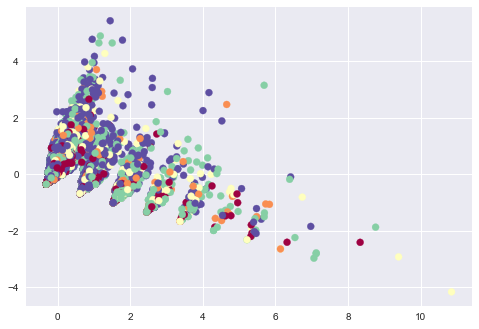

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(PCA_yelp_2_vocab[:,0], PCA_yelp_2_vocab[:,1],c=[i for i in rating],cmap='Spectral')

In [60]:
#Masking to run TSNE in a sample
msk = np.random.rand(len(rating_array)) < 0.1
rating_sample = rating_array[msk]
document_vect_sample_vocab = document_vect_vocab[msk]

In [64]:
from sklearn.manifold import TSNE
tsne_vocab = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000, random_state=0,learning_rate=500)
prob_vectors_vocab = tsne_vocab.fit_transform(document_vect_sample_vocab.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2947 samples in 0.015s...
[t-SNE] Computed neighbors for 2947 samples in 0.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2947
[t-SNE] Computed conditional probabilities for sample 2000 / 2947
[t-SNE] Computed conditional probabilities for sample 2947 / 2947
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.531891
[t-SNE] KL divergence after 4800 iterations: 0.988961


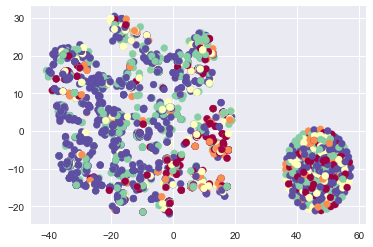

In [66]:
plt.scatter(prob_vectors_vocab[:,0], prob_vectors_vocab[:,1],c=[i for i in rating_sample],cmap='Spectral')

In [35]:
## Getting the count of key words for each restaurant
#parsed_reviews_each_rest[0]
parsed_reviews_each_rest_join = []
for i in parsed_reviews_each_rest:
    parsed_reviews_each_rest_join.append(' '.join(i))


document_vect_vocab_each_rest = Count_Vect_keyw_vocab.fit_transform(parsed_reviews_each_rest_join)


# Preparing the data for modeling

In [40]:
#Updating the rating of reviews for 2019 and 2018 only in the rest data
#Setting the category into to the category alias
#Setting the location to be the zip code
#Setting transactions as a string
for i in rest_2:
    t = i['id']
    i['rating']=rankings_2019_2018[t]
    i['categories']= i['categories'][0]['alias']
    i['location'] = i['location']['zip_code']
    if len(i['transactions'])==0:
        i['transactions'] = 'No Service'
    else:
        i['transactions'] = ','.join(i['transactions'])

In [49]:
#Transforming into a dataframe and cleaning for only usefull feautures
import pandas as pd
df = pd.DataFrame(rest_2)
df_2 = df[['id','name','rating','location','categories','price','transactions']]
df_2.set_index('id', inplace=True)

In [51]:
#transform count vectorizer as a dataframe
count_vect_df = pd.DataFrame(document_vect_vocab_each_rest.todense(), columns=Count_Vect_keyw_vocab.get_feature_names(),index=id_s)

In [52]:
# We are going to drop the restaurant with the id 'IGxQTkbFxs25yDz3gHG8bA'  because is two times when it should be unique:
'''
import statistics
statistics.mode(df_2.index)

for i in df_2.index:
    if i == 'IGxQTkbFxs25yDz3gHG8bA':
        print(i)
'''
df_3 = df_2.drop('IGxQTkbFxs25yDz3gHG8bA')
count_vect_df_2=count_vect_df.drop('IGxQTkbFxs25yDz3gHG8bA')

In [53]:
#join the two dataframe with left join 
merge_data = df_3.join(count_vect_df_2)

In [54]:
#dropping data without ratings 
merge_data.dropna(subset=['rating'], how='all', inplace=True)

In [55]:
#filling NA with is missing
merge_data['location'].fillna('No location', inplace=True)
merge_data['categories'].fillna('No categories', inplace=True)
merge_data['price'].fillna('No price', inplace=True)

In [61]:
#One hot encoding the different features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

transformed = encoder.fit_transform(merge_data[['location', 'categories','price','transactions']].to_numpy())
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names(),index=merge_data.index) 

data_final = merge_data.join(ohe_df)
data_final=data_final.drop(columns=['name','location','categories','price','transactions'])

In [150]:
#Transform rating to labels Good if rating >= 4.0, Normal if rating<4.0 and rating >= 3.0, bad if rating<3.0 
def rating(c):
    if c['rating'] >= 4:
        return 3
    elif 3 <=c['rating']<4:
        return 2
    else: 
        return 1
    
data_final['rating'] = data_final.apply(rating, axis=1)

In [151]:
#Downloading the data into a CSV file 
data_final.to_csv(r'data_final.csv')

In [156]:
corr = data_final.corr()

In [168]:
#Correlations of labels (3,2,1) with the features
corr = data_final.corr()
corr.rating.sort_values(ascending =False)[:20]

rating              1.000000
fresh               0.200672
x2_No price         0.185822
amazing             0.159202
friendly            0.157660
favorite            0.156702
flavor              0.130524
recommend           0.103856
x1_mediterranean    0.098428
enjoy               0.096598
pittsburgh          0.092483
x3_No Service       0.092203
x1_coffee           0.086980
x0_15218            0.086251
x1_cocktailbars     0.073192
x1_thai             0.072173
x1_delis            0.071005
x1_bakeries         0.066527
x0_15206            0.063752
x0_15106            0.056199
Name: rating, dtype: float64